In [ ]:
# Load the libraries

!pip install indic-nlp-library

from indicnlp.tokenize import indic_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)   #this displays the dataframe in full width
import collections
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import re
import nltk
from nltk.corpus import stopwords
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score



In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset from Google Drive

df_sarcastic = pd.read_csv('/content/drive/MyDrive/Research/IIT_BHU/Hindi_Tweets_dataset/Sarcasm_Hindi_Tweets-SARCASTIC.csv')
df_non_sarcastic = pd.read_csv('/content/drive/MyDrive/Research/IIT_BHU/Hindi_Tweets_dataset/Sarcasm_Hindi_Tweets-NON-SARCASTIC.csv')

df_sarcastic['label'] = 'sarcastic'
df_non_sarcastic['label'] = 'non_sarcastic'
df = pd.concat([df_sarcastic, df_non_sarcastic], axis=0)
df = df.drop(['username','acctdesc','location','following','followers', 'totaltweets', 'usercreatedts', 'tweetcreatedts', 'retweetcount', 'hashtags'] ,axis=1)
df = df.reset_index()
df = df.drop('index',axis=1)

# Display first few rows
df.tail(10)



,text,label
16169,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic
16170,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic
16171,तुम #बारिश और #चाय \n\nतीनों से मेरी #ज़िंदगी #मुकम्मल हो जाये \n\n#बजम \n\n#सुप्रभात \n#happy Good morning !!!!❣️ https://t.co/na3w1BBpCJ,non_sarcastic
16172,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic
16173,हानि लाभ जीवन मरण यश अपयश ये आपके वश में नही होता सच है ।। फिल्मों में आत्महत्या न करने की प्रेरणा देने वाले सुशांत सिंह ने खुद आत्महत्या कर ली बेहद दुखद।। भगवान उनकी आत्मा को शांति दे 🙏🙏🙏#sad,non_sarcastic
16174,स्वर्गीय श्री सुशांत सिंह राजपूत ने हमें छिछोरे मूवी में काम करके यह सिखाया कि संघर्ष से दूर ना भागे । आत्महत्या ना करें और अब खुद ही आत्महत्या कर ली।\n#ripsushant #ripsushantsinghrajput #ripSSR #fuck2020 #sad https://t.co/WwhrA2iqQF,non_sarcastic
16175,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic
16176,"#SushantSinghRajput #Suicide क्यों?? चमक धमक सिर्फ दिखावा है इस फिल्म इंडस्ट्री का, बाकी सब अंदर से टूटे हुए हैं चाहे फिर वो कितना भी महान अदाकार क्यों न सबकी जिंदगी सिर्फ दिखावा है सिर्फ घोर दिखावा 👎 #Sad",non_sarcastic
16177,हर हाल में #खुश रहना सीख लो🙃\n उस दिल को क्या #उदास रखना🧐\n जिसमें मेरा #भोले बसता हो❤🙏\n\n#जय_भोलेनाथ की 🙏☘🌺 📿🐚🛐\n\n@Being_Suchita @meShital_ \n@Oye_IShuu_ @sushma_pandey1\n@MansiSi62158538 @SSNaina_ https://t.co/5ouhhtgZjt,non_sarcastic
16178,"इतना कुछ पाने के बाद भी अगर इंसान जिदंगी से हार जाए , \n 🙄😒 तो उसने क्या पाया , और क्या वो खोए .... #sad #worstyear \n#sushantsinghrajpoot #sushant #ripsushant #RestInPeace 🙏🙏\n जिदंगी को हारना उत्तम नहीं है, जिदंगी को जीना सर्वोत्तम है...🙏🥺 https://t.co/D8P7sps7OI",non_sarcastic


In [ ]:
def count_length():
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))

In [ ]:
count_length()
df.tail(10)

,text,label,word_count
16169,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic,45
16170,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic,45
16171,तुम #बारिश और #चाय \n\nतीनों से मेरी #ज़िंदगी #मुकम्मल हो जाये \n\n#बजम \n\n#सुप्रभात \n#happy Good morning !!!!❣️ https://t.co/na3w1BBpCJ,non_sarcastic,19
16172,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic,45
16173,हानि लाभ जीवन मरण यश अपयश ये आपके वश में नही होता सच है ।। फिल्मों में आत्महत्या न करने की प्रेरणा देने वाले सुशांत सिंह ने खुद आत्महत्या कर ली बेहद दुखद।। भगवान उनकी आत्मा को शांति दे 🙏🙏🙏#sad,non_sarcastic,40
16174,स्वर्गीय श्री सुशांत सिंह राजपूत ने हमें छिछोरे मूवी में काम करके यह सिखाया कि संघर्ष से दूर ना भागे । आत्महत्या ना करें और अब खुद ही आत्महत्या कर ली।\n#ripsushant #ripsushantsinghrajput #ripSSR #fuck2020 #sad https://t.co/WwhrA2iqQF,non_sarcastic,36
16175,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic,45
16176,"#SushantSinghRajput #Suicide क्यों?? चमक धमक सिर्फ दिखावा है इस फिल्म इंडस्ट्री का, बाकी सब अंदर से टूटे हुए हैं चाहे फिर वो कितना भी महान अदाकार क्यों न सबकी जिंदगी सिर्फ दिखावा है सिर्फ घोर दिखावा 👎 #Sad",non_sarcastic,40
16177,हर हाल में #खुश रहना सीख लो🙃\n उस दिल को क्या #उदास रखना🧐\n जिसमें मेरा #भोले बसता हो❤🙏\n\n#जय_भोलेनाथ की 🙏☘🌺 📿🐚🛐\n\n@Being_Suchita @meShital_ \n@Oye_IShuu_ @sushma_pandey1\n@MansiSi62158538 @SSNaina_ https://t.co/5ouhhtgZjt,non_sarcastic,47
16178,"इतना कुछ पाने के बाद भी अगर इंसान जिदंगी से हार जाए , \n 🙄😒 तो उसने क्या पाया , और क्या वो खोए .... #sad #worstyear \n#sushantsinghrajpoot #sushant #ripsushant #RestInPeace 🙏🙏\n जिदंगी को हारना उत्तम नहीं है, जिदंगी को जीना सर्वोत्तम है...🙏🥺 https://t.co/D8P7sps7OI",non_sarcastic,48


In [ ]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)







In [ ]:
# Function to count words
def count_length():
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))

In [ ]:
# Remove emojis from text
for i in range(len(df)):
    df.loc[i, 'text'] = emoji_pattern.sub(r'', df.loc[i, 'text'])


count_length()
df.tail(10)

,text,label,word_count
16169,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic,45
16170,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic,45
16171,तुम #बारिश और #चाय \n\nतीनों से मेरी #ज़िंदगी #मुकम्मल हो जाये \n\n#बजम \n\n#सुप्रभात \n#happy Good morning !!!! https://t.co/na3w1BBpCJ,non_sarcastic,19
16172,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic,45
16173,हानि लाभ जीवन मरण यश अपयश ये आपके वश में नही होता सच है ।। फिल्मों में आत्महत्या न करने की प्रेरणा देने वाले सुशांत सिंह ने खुद आत्महत्या कर ली बेहद दुखद।। भगवान उनकी आत्मा को शांति दे #sad,non_sarcastic,40
16174,स्वर्गीय श्री सुशांत सिंह राजपूत ने हमें छिछोरे मूवी में काम करके यह सिखाया कि संघर्ष से दूर ना भागे । आत्महत्या ना करें और अब खुद ही आत्महत्या कर ली।\n#ripsushant #ripsushantsinghrajput #ripSSR #fuck2020 #sad https://t.co/WwhrA2iqQF,non_sarcastic,36
16175,"बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लगाकर की खुदखुशी-\n#खुदखुशी करने वालो पर मुझे तरस नही आता,\nक्योंकि दुनिया मे #खुशी और #गम दोनों मिलते है जो उसे न झेल सके वो इंसान #बुझदिल होता है!\nसुशांत तुमने सही नहीं किया!\nखैर #अल्लाह घर वालों को सब्र अता करे-आमीन\n#SushantSinghRajput https://t.co/a8pRKR5GZU",non_sarcastic,45
16176,"#SushantSinghRajput #Suicide क्यों?? चमक धमक सिर्फ दिखावा है इस फिल्म इंडस्ट्री का, बाकी सब अंदर से टूटे हुए हैं चाहे फिर वो कितना भी महान अदाकार क्यों न सबकी जिंदगी सिर्फ दिखावा है सिर्फ घोर दिखावा #Sad",non_sarcastic,40
16177,हर हाल में #खुश रहना सीख लो\n उस दिल को क्या #उदास रखना\n जिसमें मेरा #भोले बसता हो\n\n#जय_भोलेनाथ की \n\n@Being_Suchita @meShital_ \n@Oye_IShuu_ @sushma_pandey1\n@MansiSi62158538 @SSNaina_ https://t.co/5ouhhtgZjt,non_sarcastic,47
16178,"इतना कुछ पाने के बाद भी अगर इंसान जिदंगी से हार जाए , \n तो उसने क्या पाया , और क्या वो खोए .... #sad #worstyear \n#sushantsinghrajpoot #sushant #ripsushant #RestInPeace \n जिदंगी को हारना उत्तम नहीं है, जिदंगी को जीना सर्वोत्तम है... https://t.co/D8P7sps7OI",non_sarcastic,48


In [ ]:
def processText(text):
    text = text.lower()
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', '', text)  # Remove URLs
    text = re.sub(r'@[^\s]+', '', text)  # Remove @mentions
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'#([^\s]+)', r'\1', text)  # Remove the # symbol from hashtags
    text = re.sub(r'[.!:?\-\'"/]', '', text)  # Remove punctuation
    text = text.strip('"')
    return text

# Apply processText function to each row in the 'text' column
for i in range(len(df)):
    df.loc[i, 'text'] = processText(df.loc[i, 'text'])

# Function to count the length of the text
def count_length():
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))


count_length()
df.tail(10)

,text,label,word_count
16169,"बॉलीवुड एक्टर सुशांत_सिंह_राजपूत ने फांसी लगाकर की खुदखुशी खुदखुशी करने वालो पर मुझे तरस नही आता, क्योंकि दुनिया मे खुशी और गम दोनों मिलते है जो उसे न झेल सके वो इंसान बुझदिल होता है सुशांत तुमने सही नहीं किया खैर अल्लाह घर वालों को सब्र अता करेआमीन sushantsinghrajput",non_sarcastic,50
16170,"बॉलीवुड एक्टर सुशांत_सिंह_राजपूत ने फांसी लगाकर की खुदखुशी खुदखुशी करने वालो पर मुझे तरस नही आता, क्योंकि दुनिया मे खुशी और गम दोनों मिलते है जो उसे न झेल सके वो इंसान बुझदिल होता है सुशांत तुमने सही नहीं किया खैर अल्लाह घर वालों को सब्र अता करेआमीन sushantsinghrajput",non_sarcastic,50
16171,तुम बारिश और चाय तीनों से मेरी ज़िंदगी मुकम्मल हो जाये बजम सुप्रभात happy good morning,non_sarcastic,18
16172,"बॉलीवुड एक्टर सुशांत_सिंह_राजपूत ने फांसी लगाकर की खुदखुशी खुदखुशी करने वालो पर मुझे तरस नही आता, क्योंकि दुनिया मे खुशी और गम दोनों मिलते है जो उसे न झेल सके वो इंसान बुझदिल होता है सुशांत तुमने सही नहीं किया खैर अल्लाह घर वालों को सब्र अता करेआमीन sushantsinghrajput",non_sarcastic,50
16173,हानि लाभ जीवन मरण यश अपयश ये आपके वश में नही होता सच है ।। फिल्मों में आत्महत्या न करने की प्रेरणा देने वाले सुशांत सिंह ने खुद आत्महत्या कर ली बेहद दुखद।। भगवान उनकी आत्मा को शांति दे sad,non_sarcastic,40
16174,स्वर्गीय श्री सुशांत सिंह राजपूत ने हमें छिछोरे मूवी में काम करके यह सिखाया कि संघर्ष से दूर ना भागे । आत्महत्या ना करें और अब खुद ही आत्महत्या कर ली। ripsushant ripsushantsinghrajput ripssr fuck2020 sad,non_sarcastic,37
16175,"बॉलीवुड एक्टर सुशांत_सिंह_राजपूत ने फांसी लगाकर की खुदखुशी खुदखुशी करने वालो पर मुझे तरस नही आता, क्योंकि दुनिया मे खुशी और गम दोनों मिलते है जो उसे न झेल सके वो इंसान बुझदिल होता है सुशांत तुमने सही नहीं किया खैर अल्लाह घर वालों को सब्र अता करेआमीन sushantsinghrajput",non_sarcastic,50
16176,"sushantsinghrajput suicide क्यों चमक धमक सिर्फ दिखावा है इस फिल्म इंडस्ट्री का, बाकी सब अंदर से टूटे हुए हैं चाहे फिर वो कितना भी महान अदाकार क्यों न सबकी जिंदगी सिर्फ दिखावा है सिर्फ घोर दिखावा sad",non_sarcastic,37
16177,हर हाल में खुश रहना सीख लो उस दिल को क्या उदास रखना जिसमें मेरा भोले बसता हो जय_भोलेनाथ की,non_sarcastic,21
16178,"इतना कुछ पाने के बाद भी अगर इंसान जिदंगी से हार जाए , तो उसने क्या पाया , और क्या वो खोए sad worstyear sushantsinghrajpoot sushant ripsushant restinpeace जिदंगी को हारना उत्तम नहीं है, जिदंगी को जीना सर्वोत्तम है",non_sarcastic,41


In [ ]:
!pip install indic-nlp-library


In [ ]:
from indicnlp.tokenize import indic_tokenize
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens
df['text'] = df['text'].apply(lambda x: tokenization(x))

In [ ]:
def process_text_list(text_list):
    return [s.replace("\n", "") for s in text_list]

# Apply the function to each row in the 'text' column
df['text'] = df['text'].apply(lambda x: process_text_list(x) if isinstance(x, list) else x)
count_length()
df.tail(10)



,text,label,word_count
16169,"[बॉलीवुड, एक्टर, सुशांत, _, सिंह, _, राजपूत, ने, फांसी, लगाकर, की, खुदखुशी, खुदखुशी, करने, वालो, पर, मुझे, तरस, नही, आता, ,, क्योंकि, दुनिया, मे, खुशी, और, गम, दोनों, मिलते, है, जो, उसे, न, झेल, सके, वो, इंसान, बुझदिल, होता, है, सुशांत, तुमने, सही, नहीं, किया, खैर, अल्लाह, घर, वालों, को, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54
16170,"[बॉलीवुड, एक्टर, सुशांत, _, सिंह, _, राजपूत, ने, फांसी, लगाकर, की, खुदखुशी, खुदखुशी, करने, वालो, पर, मुझे, तरस, नही, आता, ,, क्योंकि, दुनिया, मे, खुशी, और, गम, दोनों, मिलते, है, जो, उसे, न, झेल, सके, वो, इंसान, बुझदिल, होता, है, सुशांत, तुमने, सही, नहीं, किया, खैर, अल्लाह, घर, वालों, को, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54
16171,"[तुम, बारिश, और, चाय, तीनों, से, मेरी, ज़िंदगी, मुकम्मल, हो, जाये, बजम, सुप्रभात, happy, good, morning]",non_sarcastic,16
16172,"[बॉलीवुड, एक्टर, सुशांत, _, सिंह, _, राजपूत, ने, फांसी, लगाकर, की, खुदखुशी, खुदखुशी, करने, वालो, पर, मुझे, तरस, नही, आता, ,, क्योंकि, दुनिया, मे, खुशी, और, गम, दोनों, मिलते, है, जो, उसे, न, झेल, सके, वो, इंसान, बुझदिल, होता, है, सुशांत, तुमने, सही, नहीं, किया, खैर, अल्लाह, घर, वालों, को, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54
16173,"[हानि, लाभ, जीवन, मरण, यश, अपयश, ये, आपके, वश, में, नही, होता, सच, है, ।, ।, फिल्मों, में, आत्महत्या, न, करने, की, प्रेरणा, देने, वाले, सुशांत, सिंह, ने, खुद, आत्महत्या, कर, ली, बेहद, दुखद, ।, ।, भगवान, उनकी, आत्मा, को, शांति, दे, sad]",non_sarcastic,43
16174,"[स्वर्गीय, श्री, सुशांत, सिंह, राजपूत, ने, हमें, छिछोरे, मूवी, में, काम, करके, यह, सिखाया, कि, संघर्ष, से, दूर, ना, भागे, ।, आत्महत्या, ना, करें, और, अब, खुद, ही, आत्महत्या, कर, ली, ।, ripsushant, ripsushantsinghrajput, ripssr, fuck2020, sad]",non_sarcastic,37
16175,"[बॉलीवुड, एक्टर, सुशांत, _, सिंह, _, राजपूत, ने, फांसी, लगाकर, की, खुदखुशी, खुदखुशी, करने, वालो, पर, मुझे, तरस, नही, आता, ,, क्योंकि, दुनिया, मे, खुशी, और, गम, दोनों, मिलते, है, जो, उसे, न, झेल, सके, वो, इंसान, बुझदिल, होता, है, सुशांत, तुमने, सही, नहीं, किया, खैर, अल्लाह, घर, वालों, को, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54
16176,"[sushantsinghrajput, suicide, क्यों, चमक, धमक, सिर्फ, दिखावा, है, इस, फिल्म, इंडस्ट्री, का, ,, बाकी, सब, अंदर, से, टूटे, हुए, हैं, चाहे, फिर, वो, कितना, भी, महान, अदाकार, क्यों, न, सबकी, जिंदगी, सिर्फ, दिखावा, है, सिर्फ, घोर, दिखावा, sad]",non_sarcastic,38
16177,"[हर, हाल, में, खुश, रहना, सीख, लो, उस, दिल, को, क्या, उदास, रखना, जिसमें, मेरा, भोले, बसता, हो, जय, _, भोलेनाथ, की]",non_sarcastic,22
16178,"[इतना, कुछ, पाने, के, बाद, भी, अगर, इंसान, जिदंगी, से, हार, जाए, ,, तो, उसने, क्या, पाया, ,, और, क्या, वो, खोए, sad, worstyear, sushantsinghrajpoot, sushant, ripsushant, restinpeace, जिदंगी, को, हारना, उत्तम, नहीं, है, ,, जिदंगी, को, जीना, सर्वोत्तम, है]",non_sarcastic,40


In [ ]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
punctuations = ['nn','n', '।','/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}','|','"']
to_be_removed = stopwords_hi + punctuations + stopwords_en


In [ ]:
df['text'] = df['text'].apply(lambda x: [ele for ele in x if ele not in to_be_removed])

df.tail(10)


,text,label,word_count
16169,"[बॉलीवुड, एक्टर, सुशांत, सिंह, राजपूत, फांसी, लगाकर, खुदखुशी, खुदखुशी, वालो, तरस, नही, आता, दुनिया, खुशी, गम, दोनों, मिलते, झेल, सके, वो, इंसान, बुझदिल, सुशांत, तुमने, सही, खैर, अल्लाह, वालों, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54
16170,"[बॉलीवुड, एक्टर, सुशांत, सिंह, राजपूत, फांसी, लगाकर, खुदखुशी, खुदखुशी, वालो, तरस, नही, आता, दुनिया, खुशी, गम, दोनों, मिलते, झेल, सके, वो, इंसान, बुझदिल, सुशांत, तुमने, सही, खैर, अल्लाह, वालों, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54
16171,"[बारिश, चाय, तीनों, ज़िंदगी, मुकम्मल, जाये, बजम, सुप्रभात, happy, good, morning]",non_sarcastic,16
16172,"[बॉलीवुड, एक्टर, सुशांत, सिंह, राजपूत, फांसी, लगाकर, खुदखुशी, खुदखुशी, वालो, तरस, नही, आता, दुनिया, खुशी, गम, दोनों, मिलते, झेल, सके, वो, इंसान, बुझदिल, सुशांत, तुमने, सही, खैर, अल्लाह, वालों, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54
16173,"[हानि, लाभ, जीवन, मरण, यश, अपयश, वश, नही, सच, फिल्मों, आत्महत्या, प्रेरणा, देने, सुशांत, सिंह, खुद, आत्महत्या, ली, बेहद, दुखद, भगवान, आत्मा, शांति, दे, sad]",non_sarcastic,43
16174,"[स्वर्गीय, सुशांत, सिंह, राजपूत, हमें, छिछोरे, मूवी, काम, करके, सिखाया, संघर्ष, दूर, भागे, आत्महत्या, अब, खुद, आत्महत्या, ली, ripsushant, ripsushantsinghrajput, ripssr, fuck2020, sad]",non_sarcastic,37
16175,"[बॉलीवुड, एक्टर, सुशांत, सिंह, राजपूत, फांसी, लगाकर, खुदखुशी, खुदखुशी, वालो, तरस, नही, आता, दुनिया, खुशी, गम, दोनों, मिलते, झेल, सके, वो, इंसान, बुझदिल, सुशांत, तुमने, सही, खैर, अल्लाह, वालों, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54
16176,"[sushantsinghrajput, suicide, क्यों, चमक, धमक, सिर्फ, दिखावा, फिल्म, इंडस्ट्री, बाकी, टूटे, चाहे, वो, महान, अदाकार, क्यों, सबकी, जिंदगी, सिर्फ, दिखावा, सिर्फ, घोर, दिखावा, sad]",non_sarcastic,38
16177,"[हर, हाल, खुश, रहना, सीख, लो, दिल, क्या, उदास, रखना, जिसमें, मेरा, भोले, बसता, जय, भोलेनाथ]",non_sarcastic,22
16178,"[इतना, पाने, अगर, इंसान, जिदंगी, हार, जाए, उसने, क्या, पाया, क्या, वो, खोए, sad, worstyear, sushantsinghrajpoot, sushant, ripsushant, restinpeace, जिदंगी, हारना, उत्तम, जिदंगी, जीना, सर्वोत्तम]",non_sarcastic,40


array([<Axes: title={'center': 'non_sarcastic'}>,
       <Axes: title={'center': 'sarcastic'}>], dtype=object)

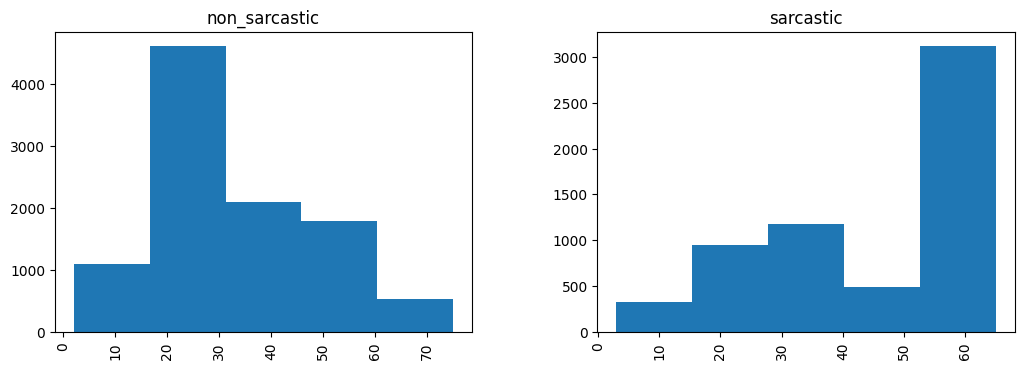

In [ ]:
df.hist(column = 'word_count', by ='label',figsize=(12,4), bins = 5)

In [ ]:
corpus_list =[]
for i in range(len(df)):
    corpus_list +=df['text'][i]
counter=collections.Counter(corpus_list)
print(counter)

Counter({'happy': 2568, 'जिनपिंग': 2380, 'तिब्बत': 2380, 'सीधे': 2380, 'शंघाई': 2380, 'कब्जा': 2380, 'जंग': 2380, 'जायज़': 2380, 'द': 2380, 'ठरकी': 2380, 'कांग्रेस': 2360, 'एडविना': 2230, 'आक': 2230, 'थू': 2230, 'sad': 2044, 'hai': 1804, 'इश्क': 1800, 'हमारे': 1730, 'खुशी': 1675, 'स्कूल': 1665, 'smile': 1434, 'जिंदगी': 1351, 'सरकार': 1350, 'दुख': 1270, 'sarcasm': 1212, 'चला': 1155, 'पिता': 1080, 'बस': 1075, 'हर': 1025, 'day': 1005, 'fathers': 994, 'लोग': 950, 'आने': 940, 'मंत्री': 935, 'नही': 933, 'कभी': 925, 'बड़ा': 919, 'क्या': 916, 'पता': 915, 'बेटे': 895, 'बच्चों': 880, 'रहते': 875, 'गांव': 865, 'हरे': 840, 'मोहल्ले': 825, 'भतीजे': 820, 'कैंटीन': 820, 'भांजे': 820, 'पढ़ाने': 820, 'रिश्तेदार': 820, 'मेरा': 820, 'चीन': 818, 'अब': 733, 'नाम': 725, 'देता': 710, 'love': 681, 'ki': 677, 'खत्म': 665, 'जाती': 631, 'खुद': 628, 'उदास': 598, 'quotes': 590, 'आपको': 581, 'याद': 580, 'nahi': 553, 'मिल': 551, 'se': 550, 'दिन': 542, 'सुख': 540, 'दिल्ली': 535, 'bhi': 525, 'कृष्ण': 520, 'birthday': 

In [ ]:
to_remove = ['नेहरू', 'लेते', 'कटाक्ष', 'जय', 'शी', 'अगर', 'मास्टर', 'वो', 'सिगरेट', 'बीवी', 'इश्क़', 'किताब', 'वश', 'पटाकर', 'पिलाकर']

# Function to filter out words in to_remove from each list in 'text' column
def remove_words(row):
    return [ele for ele in row if ele not in to_remove]

# Apply the function to each row in 'text' column using .apply and lambda function
df['text'] = df['text'].apply(lambda x: remove_words(x))

# Function to count the length of the 'text' column after removal of words
def count_length():
    df['length'] = df['text'].apply(len)


count_length()
df.tail(10)


,text,label,word_count,length
16169,"[बॉलीवुड, एक्टर, सुशांत, सिंह, राजपूत, फांसी, लगाकर, खुदखुशी, खुदखुशी, वालो, तरस, नही, आता, दुनिया, खुशी, गम, दोनों, मिलते, झेल, सके, इंसान, बुझदिल, सुशांत, तुमने, सही, खैर, अल्लाह, वालों, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54,32
16170,"[बॉलीवुड, एक्टर, सुशांत, सिंह, राजपूत, फांसी, लगाकर, खुदखुशी, खुदखुशी, वालो, तरस, नही, आता, दुनिया, खुशी, गम, दोनों, मिलते, झेल, सके, इंसान, बुझदिल, सुशांत, तुमने, सही, खैर, अल्लाह, वालों, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54,32
16171,"[बारिश, चाय, तीनों, ज़िंदगी, मुकम्मल, जाये, बजम, सुप्रभात, happy, good, morning]",non_sarcastic,16,11
16172,"[बॉलीवुड, एक्टर, सुशांत, सिंह, राजपूत, फांसी, लगाकर, खुदखुशी, खुदखुशी, वालो, तरस, नही, आता, दुनिया, खुशी, गम, दोनों, मिलते, झेल, सके, इंसान, बुझदिल, सुशांत, तुमने, सही, खैर, अल्लाह, वालों, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54,32
16173,"[हानि, लाभ, जीवन, मरण, यश, अपयश, नही, सच, फिल्मों, आत्महत्या, प्रेरणा, देने, सुशांत, सिंह, खुद, आत्महत्या, ली, बेहद, दुखद, भगवान, आत्मा, शांति, दे, sad]",non_sarcastic,43,24
16174,"[स्वर्गीय, सुशांत, सिंह, राजपूत, हमें, छिछोरे, मूवी, काम, करके, सिखाया, संघर्ष, दूर, भागे, आत्महत्या, अब, खुद, आत्महत्या, ली, ripsushant, ripsushantsinghrajput, ripssr, fuck2020, sad]",non_sarcastic,37,23
16175,"[बॉलीवुड, एक्टर, सुशांत, सिंह, राजपूत, फांसी, लगाकर, खुदखुशी, खुदखुशी, वालो, तरस, नही, आता, दुनिया, खुशी, गम, दोनों, मिलते, झेल, सके, इंसान, बुझदिल, सुशांत, तुमने, सही, खैर, अल्लाह, वालों, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54,32
16176,"[sushantsinghrajput, suicide, क्यों, चमक, धमक, सिर्फ, दिखावा, फिल्म, इंडस्ट्री, बाकी, टूटे, चाहे, महान, अदाकार, क्यों, सबकी, जिंदगी, सिर्फ, दिखावा, सिर्फ, घोर, दिखावा, sad]",non_sarcastic,38,23
16177,"[हर, हाल, खुश, रहना, सीख, लो, दिल, क्या, उदास, रखना, जिसमें, मेरा, भोले, बसता, भोलेनाथ]",non_sarcastic,22,15
16178,"[इतना, पाने, इंसान, जिदंगी, हार, जाए, उसने, क्या, पाया, क्या, खोए, sad, worstyear, sushantsinghrajpoot, sushant, ripsushant, restinpeace, जिदंगी, हारना, उत्तम, जिदंगी, जीना, सर्वोत्तम]",non_sarcastic,40,23


In [ ]:
from collections import Counter

# Calculate least common words
least_common = [word for word, word_count in Counter(corpus_list).most_common()[:-50:-1]]
print("Least Common Words:", least_common)  # Debug print to check least common words

# Function to filter out least common words from each list in 'text' column
def remove_least_common(row):
    return [ele for ele in row if ele not in least_common]

# Apply the function to each row in 'text' column using .apply and lambda function
df['text'] = df['text'].apply(lambda x: remove_least_common(x))

# Debug: Print a few rows from 'text' column to check if filtering worked
print("Filtered 'text' Column:")
for i in range(10):  # Print first 10 rows
    print(df['text'][i])

# Display the last 10 rows to check the result
print("\nLast 10 Rows of DataFrame:")
df.tail(10)



Least Common Words: ['reet', 'hotey', 'nok', 'chaku', 'phal', 'meethey', 'rkho', 'bano', 'achey', 'चलेगा', 'अभियान', 'जागरूकता', 'जासकता', 'सहना', 'सहा', 'सिखाता', 'चीजों', 'हुंकार', 'बिहारी', 'राते', 'सूनी', 'अरविंद', 'प्रतिभागियों', 'फिट', 'उपलक्ष', 'चौहान', 'अजय', 'पावटा', 'पूतला', 'फूंका', 'राष्ट्रपति', 'biharregiment', 'संकीर्तन', 'हरि', 'देव', 'गोविंद', 'सूर्य', 'सदी', 'अदाकार', 'धमक', 'चमक', 'fuck2020', 'भागे', 'मूवी', 'छिछोरे', 'स्वर्गीय', 'प्रेरणा', 'अपयश', 'मरण']
Filtered 'text' Column:
['हमारे', 'गांव', 'रहते', 'मोहल्ले', 'बच्चों', 'स्कूल', 'आने', 'बड़ा', 'पता', 'चला', 'स्कूल', 'बेटे', 'बस', 'भतीजे', 'कैंटीन', 'भांजे', 'पढ़ाने', 'रिश्तेदार', 'सरकार', 'मंत्री']
['हमारे', 'गांव', 'रहते', 'मोहल्ले', 'बच्चों', 'स्कूल', 'आने', 'बड़ा', 'पता', 'चला', 'स्कूल', 'बेटे', 'बस', 'भतीजे', 'कैंटीन', 'भांजे', 'पढ़ाने', 'रिश्तेदार', 'सरकार', 'मंत्री']
['हमारे', 'गांव', 'रहते', 'मोहल्ले', 'बच्चों', 'स्कूल', 'आने', 'बड़ा', 'पता', 'चला', 'स्कूल', 'बेटे', 'बस', 'भतीजे', 'कैंटीन', 'भांजे', 'पढ़ान

,text,label,word_count,length
16169,"[बॉलीवुड, एक्टर, सुशांत, सिंह, राजपूत, फांसी, लगाकर, खुदखुशी, खुदखुशी, वालो, तरस, नही, आता, दुनिया, खुशी, गम, दोनों, मिलते, झेल, सके, इंसान, बुझदिल, सुशांत, तुमने, सही, खैर, अल्लाह, वालों, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54,32
16170,"[बॉलीवुड, एक्टर, सुशांत, सिंह, राजपूत, फांसी, लगाकर, खुदखुशी, खुदखुशी, वालो, तरस, नही, आता, दुनिया, खुशी, गम, दोनों, मिलते, झेल, सके, इंसान, बुझदिल, सुशांत, तुमने, सही, खैर, अल्लाह, वालों, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54,32
16171,"[बारिश, चाय, तीनों, ज़िंदगी, मुकम्मल, जाये, बजम, सुप्रभात, happy, good, morning]",non_sarcastic,16,11
16172,"[बॉलीवुड, एक्टर, सुशांत, सिंह, राजपूत, फांसी, लगाकर, खुदखुशी, खुदखुशी, वालो, तरस, नही, आता, दुनिया, खुशी, गम, दोनों, मिलते, झेल, सके, इंसान, बुझदिल, सुशांत, तुमने, सही, खैर, अल्लाह, वालों, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54,32
16173,"[हानि, लाभ, जीवन, यश, नही, सच, फिल्मों, आत्महत्या, देने, सुशांत, सिंह, खुद, आत्महत्या, ली, बेहद, दुखद, भगवान, आत्मा, शांति, दे, sad]",non_sarcastic,43,24
16174,"[सुशांत, सिंह, राजपूत, हमें, काम, करके, सिखाया, संघर्ष, दूर, आत्महत्या, अब, खुद, आत्महत्या, ली, ripsushant, ripsushantsinghrajput, ripssr, sad]",non_sarcastic,37,23
16175,"[बॉलीवुड, एक्टर, सुशांत, सिंह, राजपूत, फांसी, लगाकर, खुदखुशी, खुदखुशी, वालो, तरस, नही, आता, दुनिया, खुशी, गम, दोनों, मिलते, झेल, सके, इंसान, बुझदिल, सुशांत, तुमने, सही, खैर, अल्लाह, वालों, सब्र, अता, करेआमीन, sushantsinghrajput]",non_sarcastic,54,32
16176,"[sushantsinghrajput, suicide, क्यों, सिर्फ, दिखावा, फिल्म, इंडस्ट्री, बाकी, टूटे, चाहे, महान, क्यों, सबकी, जिंदगी, सिर्फ, दिखावा, सिर्फ, घोर, दिखावा, sad]",non_sarcastic,38,23
16177,"[हर, हाल, खुश, रहना, सीख, लो, दिल, क्या, उदास, रखना, जिसमें, मेरा, भोले, बसता, भोलेनाथ]",non_sarcastic,22,15
16178,"[इतना, पाने, इंसान, जिदंगी, हार, जाए, उसने, क्या, पाया, क्या, खोए, sad, worstyear, sushantsinghrajpoot, sushant, ripsushant, restinpeace, जिदंगी, हारना, उत्तम, जिदंगी, जीना, सर्वोत्तम]",non_sarcastic,40,23


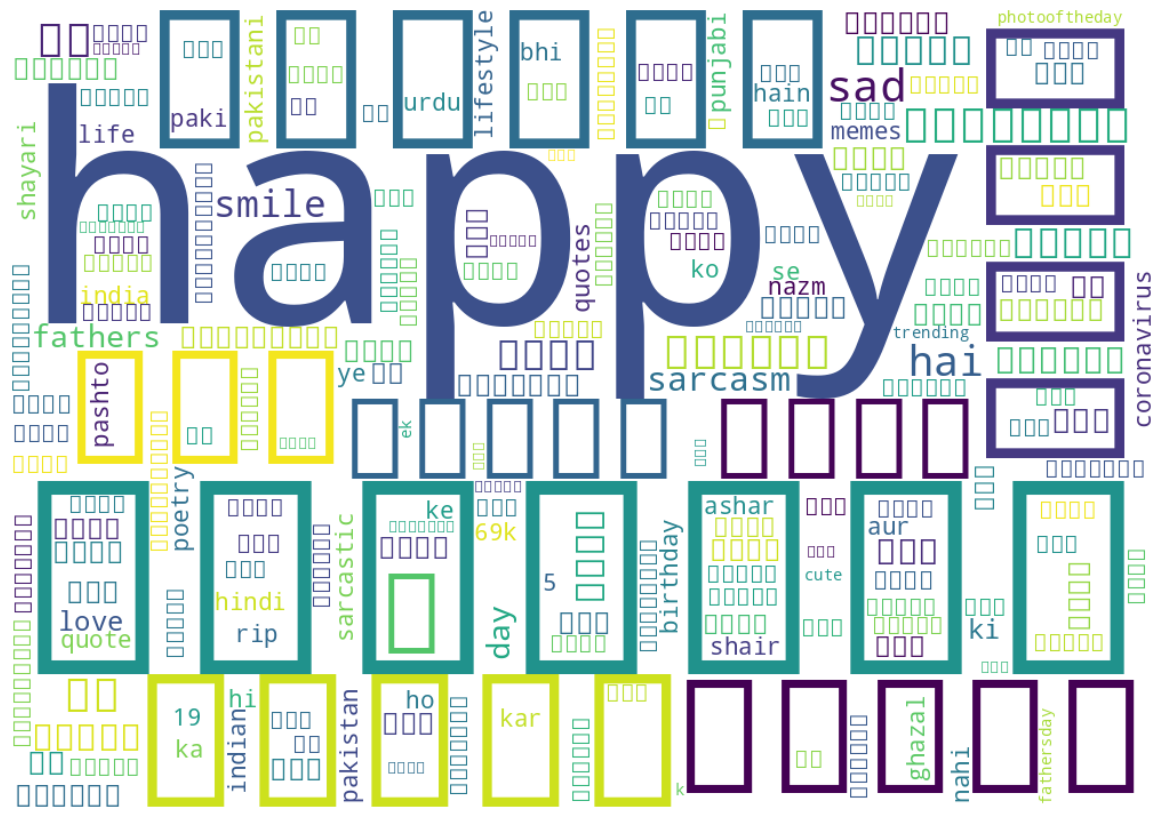

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df_list = []
for i in range(len(df)):
    df_list +=df['text'][i]
dictionary=Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(dictionary)
# plot the WordCloud image
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


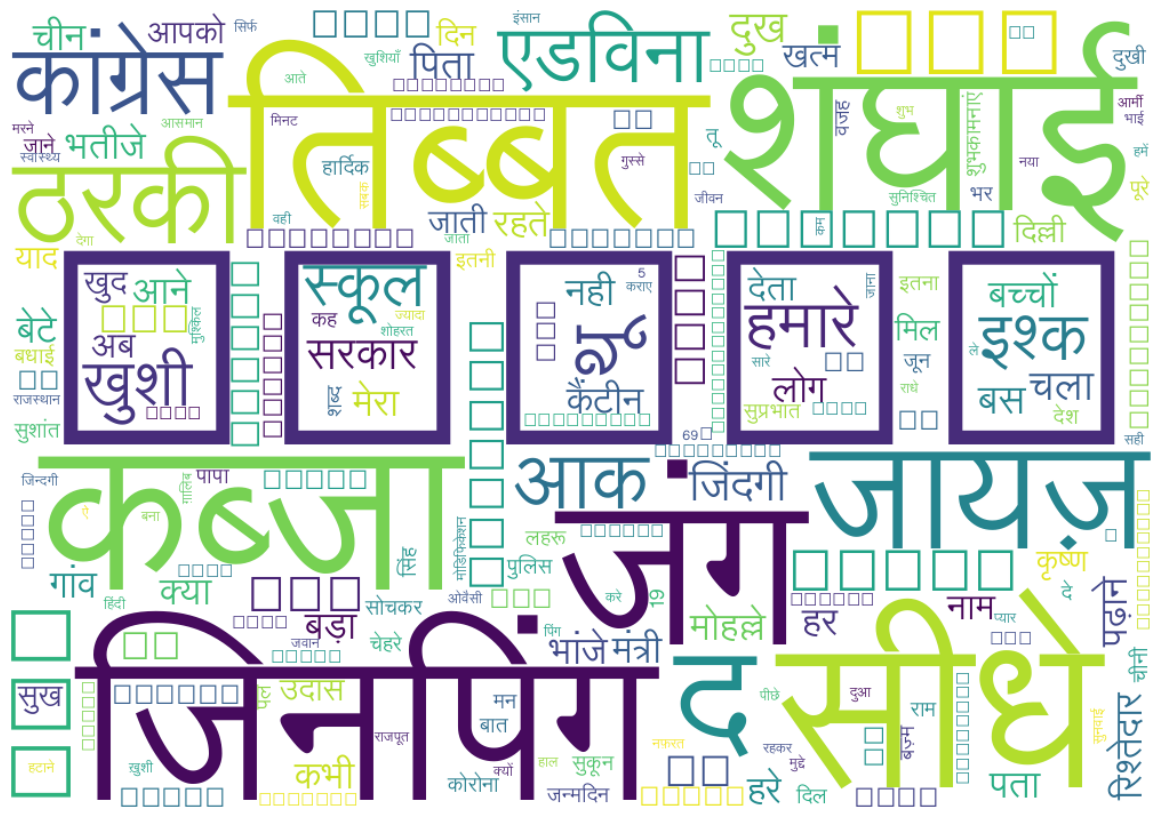

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df_list = []
for i in range(len(df)):
    df_list +=df['text'][i]
    font = "Lohit-Devanagari.ttf"
dictionary=Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10,font_path='/content/drive/MyDrive/Research/IIT_BHU/Hindi_Tweets_dataset/lohit_devanagari/Lohit-Devanagari.ttf' ).generate_from_frequencies(dictionary)
# plot the WordCloud image
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# Splitting the dataset
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train_texts, train_labels = train_df['text'].values, train_df['label'].values
test_texts, test_labels = test_df['text'].values, test_df['label'].values

# **Logistic** **Regression**

In [ ]:

# Handle NaN or empty values in the text column
df['text'].fillna('', inplace=True)

# Define features (X) and labels (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train_texts, train_labels = train_df['text'].tolist(), train_df['label'].values
test_texts, test_labels = test_df['text'].tolist(), test_df['label'].values

# Ensure all elements in train_texts and test_texts are strings
train_texts = [str(text) for text in train_texts]
test_texts = [str(text) for text in test_texts]

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(train_texts)
X_test_tfidf = vectorizer.transform(test_texts)


# Train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_tfidf, train_labels)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100
f1_percentage = f1 * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print(f'Precision: {precision_percentage:.2f}')
print(f'Recall: {recall_percentage:.2f}')
print(f'F1-score: {f1_percentage:.2f}')

Accuracy: 99.85%
Precision: 99.85
Recall: 99.85
F1-score: 99.85


# **Decision Tree Classifier**

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Handle NaN or empty values in the text column
df['text'].fillna('', inplace=True)

# Define features (X) and labels (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.9, stratify=df['label'], random_state=42)
train_texts, train_labels = train_df['text'].tolist(), train_df['label'].values
test_texts, test_labels = test_df['text'].tolist(), test_df['label'].values

# Ensure all elements in train_texts and test_texts are strings
train_texts = [str(text) for text in train_texts]
test_texts = [str(text) for text in test_texts]

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(train_texts)
X_test_tfidf = vectorizer.transform(test_texts)

# Train the Decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, train_labels)


# Make predictions on the test set
y_pred = dt_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100
f1_percentage = f1 * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print(f'Precision: {precision_percentage:.2f}%')
print(f'Recall: {recall_percentage:.2f}%')
print(f'F1-score: {f1_percentage:.2f}%')


Accuracy: 98.22%
Precision: 98.23%
Recall: 98.22%
F1-score: 98.22%
